In [190]:
"""
@author: Brian Yang
@last updated: 05/20/2021
@reference: https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy
"""

'\n@author: Brian Yang\n@last updated: 05/20/2021\n@reference: https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy\n'

In [318]:
%matplotlib widget
%matplotlib inline

In [319]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import json
import re
import circlify

In [320]:
sourceURL = r"https://docs.google.com/spreadsheets/d/e/2PACX-1vSarN4YCESL2B7fMvyX8mtOirsX4gjxJxcXuAHgHX7YL6r1RO1i5X6b6KHaYBNyChglfd3oTydnIbpm/pub?gid=1227834430&single=true&output=csv"

In [321]:
cleanedHd = []
for col in df.columns:
    if not col.startswith('Unnamed'):
        cleanedHd.append(col)

In [322]:
df = pd.read_csv(sourceURL, encoding='utf8')
df = df[cleanedHd]

In [323]:
circledf = df[['Project', 
               'Year', 
               'Topic (Water, Data)', 
               'Subtopic ([Water: Quality, Equity, Reliability/Resiliency, Affordability], [Data: Quality, Accessibility]']]

circledf = circledf.rename(columns={'Topic (Water, Data)':'Topic', 
                                    'Subtopic ([Water: Quality, Equity, Reliability/Resiliency, Affordability], [Data: Quality, Accessibility]':'Subtopic'})

# circledf['Project'] = circledf['Project'].str.lower()
circledf['Topic'] = circledf['Topic'].str.lower()
circledf['Topic'] = circledf['Topic'].str.slice(stop=1)
circledf['Subtopic'] = circledf['Subtopic'].str.lower()
circledf['Subtopic'] = circledf['Subtopic'].str.slice(stop=1)

# circledf['Count'] = circledf.Project.str.len()
circledf['Count'] = df['Team members'].str.count(',')+1

circledf.head()

,Project,Year,Topic,Subtopic,Count
0,Aggregating Municipal and State Open Data for ...,2016,d,q,8
1,CA H2Open,2016,w,r,4
2,Microsoft Cortana Intelligence,2016,d,a,1
3,The Dams of California,2016,d,a,1
4,Preliminary Analysis of Surface Water Toxicity...,2016,w,q,1


In [324]:
# categorize by year
yr16df = circledf[circledf['Year'] == 2016]
yr18df = circledf[circledf['Year'] == 2018]
yr19df = circledf[circledf['Year'] == 2019]
yr20df = circledf[circledf['Year'] == 2020]

In [325]:
# categorize each year by topic
d2016df = yr16df[yr16df['Topic'] == 'd']
w2016df = yr16df[yr16df['Topic'] == 'w']

d2018df = yr18df[yr18df['Topic'] == 'd']
w2018df = yr18df[yr18df['Topic'] == 'w']

d2019df = yr19df[yr19df['Topic'] == 'd']
w2019df = yr19df[yr19df['Topic'] == 'w']

d2020df = yr20df[yr20df['Topic'] == 'd']
w2020df = yr20df[yr20df['Topic'] == 'w']

In [326]:
# categorize 2016 by subtopics
d16adf = d2016df[d2016df['Subtopic'] == 'a']
d16qdf = d2016df[d2016df['Subtopic'] == 'q']

w16adf = w2016df[w2016df['Subtopic'] == 'a']
w16edf = w2016df[w2016df['Subtopic'] == 'e']
w16qdf = w2016df[w2016df['Subtopic'] == 'q']
w16rdf = w2016df[w2016df['Subtopic'] == 'r']

In [327]:
# categorize 2018 by subtopics
d18adf = d2018df[d2018df['Subtopic'] == 'a']
d18qdf = d2018df[d2018df['Subtopic'] == 'q']

w18adf = w2018df[w2018df['Subtopic'] == 'a']
w18edf = w2018df[w2018df['Subtopic'] == 'e']
w18qdf = w2018df[w2018df['Subtopic'] == 'q']
w18rdf = w2018df[w2018df['Subtopic'] == 'r']

In [328]:
# categorize 2019 by subtopics
d19adf = d2019df[d2019df['Subtopic'] == 'a']
d19qdf = d2019df[d2019df['Subtopic'] == 'q']

w19adf = w2019df[w2019df['Subtopic'] == 'a']
w19edf = w2019df[w2019df['Subtopic'] == 'e']
w19qdf = w2019df[w2019df['Subtopic'] == 'q']
w19rdf = w2019df[w2019df['Subtopic'] == 'r']

In [329]:
# categorize 2020 by subtopics
d20adf = d2020df[d2020df['Subtopic'] == 'a']
d20qdf = d2020df[d2020df['Subtopic'] == 'q']

w20adf = w2020df[w2020df['Subtopic'] == 'a']
w20edf = w2020df[w2020df['Subtopic'] == 'e']
w20qdf = w2020df[w2020df['Subtopic'] == 'q']
w20rdf = w2020df[w2020df['Subtopic'] == 'r']

In [330]:
# build json from csv based on categories of interest
# for circular packing visualization
data = [{
    'id': 'Water Data Challenge',
    'datum': np.sum(circledf.Count),
    'children': [
        { 'id': 2016, 'datum': np.sum(yr16df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2016df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d16adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d16adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d16qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d16qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2016df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w16adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w16edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w16qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w16rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w16rdf.iterrows()
                ]}
            ]}
        ]},
        { 'id': 2018, 'datum': np.sum(yr18df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2018df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d18adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d18adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d18qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d18qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2018df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w18adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w18edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w18qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w18rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w18rdf.iterrows()
                ]}
            ]}
        ]},
        { 'id': 2019, 'datum': np.sum(yr19df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2019df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d19adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d19adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d19qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d19qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2019df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w19adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w19edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w19qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w19rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w19rdf.iterrows()
                ]}
            ]}
        ]},
        { 'id': 2020, 'datum': np.sum(yr20df.Count), 'children': [
            { 'id': 'd', 'datum': np.sum(d2020df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(d20adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d20adf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(d20qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in d20qdf.iterrows()
                ]}
            ]},
            { 'id': 'w', 'datum': np.sum(w2020df.Count), 'children': [
                { 'id': 'a', 'datum': np.sum(w20adf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20adf.iterrows()
                ]},
                { 'id': 'e', 'datum': np.sum(w20edf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20edf.iterrows()
                ]},
                { 'id': 'q', 'datum': np.sum(w20qdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20qdf.iterrows()
                ]},
                { 'id': 'r', 'datum': np.sum(w20rdf.Count), 'children': [
                    { 'id': r.Project, 'datum': r.Count } for i, r in w20rdf.iterrows()
                ]}
            ]}
        ]}
    ]
}]

In [331]:
circles = circlify.circlify(
    data, 
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

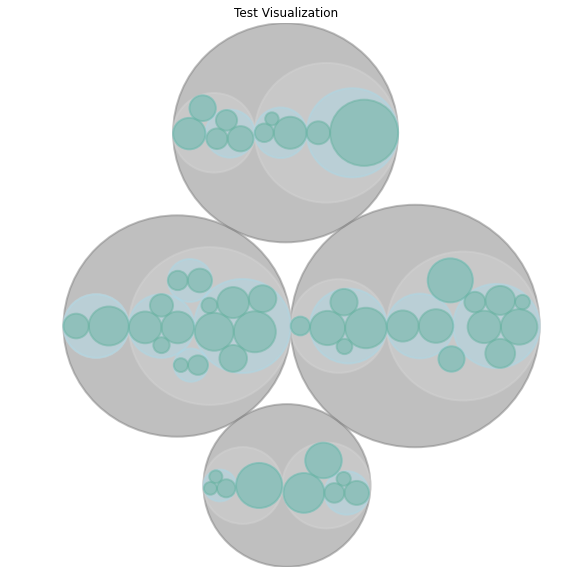

In [332]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Test Visualization')
ax.axis('off')

lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="grey"))

for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    # label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightgrey"))
    # plt.annotate(label, (x,y ), ha='center', color="white")

for circle in circles:
    if circle.level != 4:
      continue
    x, y, r = circle
    # label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))
    # plt.annotate(label, (x,y ), ha='center', color="white")

for circle in circles:
    if circle.level != 5:
      continue
    x, y, r = circle
    # label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
    # plt.annotate(label, (x,y ), ha='center', color="white")

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    # plt.annotate(label, (x,y ) ,va='top', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

plt.show();


In [355]:
allPpl = set()
for yr in [2016, 2018, 2019, 2020]:
    tmpdf = df[df['Year'] == yr]
    people = set()
    for team in tmpdf['Team members']:
        if (yr == 2019) and (team.startswith('Dr.')):
            team = 'Eric Schwartz, Jacob Abernethy, Jared Webb, Ian Robinson, Michael McDaniel'
        for ppl in re.split(r',|\.', team):
            # this can see who's part of the 13-member team in 2020
            # if (yr == 2020) and (team.startswith('Gregor Allensworth')):
            #     ppl += '*'
            if ppl not in ['', '*']:
                people.add(ppl.strip())
        allPpl |= people

    
    
    print(str(yr) + ':')
    print(len(people), 'people')
    print(len(tmpdf), 'projects')
    print(people)
    print()

2016:
27 people
9 projects
{'Edward Spang', 'Bryan Pastor', 'Justin Grewal', 'Joel Natividad', 'Kelvin Liu', 'Grant Sharp', 'Jonny Sandu', 'Yoni Ackerman', 'Eric Bollens', 'Roy Fleshman', 'Mark Tompkins', 'Andrew Blythe', 'Travis Ludlum', 'Michael Cruz', 'Andrew Holguin', 'Eduardo Parra', 'Mike Urkov', 'Mike Dougherty', 'Jason Locklin', 'Alberto Curiel', 'Gustavo Iturriaga', 'Seth Lalonde', 'Sami Baig', 'Adrian Alvarez', 'Frank Loge', 'Cyrus Pinto', 'Amanda Iaali'}

2018:
49 people
16 projects
{'Daniel Siegel', 'Megan Brooks', 'Alvar Escriva-Bou', 'Abdel Alfahham', 'Ludovico Bianchi', 'Jacqueline Barkoski', 'Masha Aseeva', 'Hervé Guillon', 'Kevin Chen', 'Bradley Justice', 'Christopher Tull', 'Arun Ramamurthy', 'Laura Deehan', 'Cory Copeland', 'Lo Benichou', 'Ryan Thyssen', 'Rucker Alex', 'Elena Smith', 'Kate Anderson', 'Eric Kim', 'Ron Melcer', 'Jeff Pawlak', 'Scott Navarro', 'Chris Kwan', 'Priya Shivaani Chauhan', 'Vihan Bhargava', 'Sean Furuta', 'Leonard Shaw', 'Dan Constable', 'Juan

In [354]:
print(len(allPpl), 'people \n', allPpl)

173 people 
 {'Edward Spang', 'Jose Gustavo', 'Natalie Garcia-Grazier*', 'Amanda Fencl*', 'Rachel Morello-Frosch*', 'Sean Pennino', 'Jacqueline Barkoski', 'Vicotira Mak', 'Kevin Chen', 'Avery Kreuger', 'Kyle Onda', 'Fethi Benjamena', 'Kelvin Liu', 'Christopher Tull', 'Yoni Ackerman', 'Ryan Thyssen', 'Rob Gailey*', 'Caidan Yang', 'Mark Tompkins', 'Gao Lynn', 'Sara Biazar', 'Michael Lutz', 'Julie Ekstrom', 'Benjamin Kinsella', 'Mike Urkov', 'Daniel Dufour', 'Cori Gaul', 'Scott Navarro', 'Sean Furuta', 'Susana De Anda*', 'Albert Chavez', 'Mike Dougherty', 'Juan Manfredi', 'Debi Ores*', 'Gustavo Iturriaga', 'James Duncan', 'Darcy Bostic', 'Nirmala Benin', 'Junjun Dong', 'Spencer Harris', 'Indrani Pal', 'María Lamadrid*', 'Forrest Corcoran', 'Nicole Look', 'Emanuel Rodriguez', 'Rich Pauloo', 'Megan Brooks', 'David Okita*', 'Joel Natividad', 'Peter Burek', 'Carolina Balazs*', 'Yessenia Chaiu Zhang*', 'Michelle Fedrick', 'Grant Sharp', 'Jonny Sandu', 'Eric Bollens', 'Arun Ramamurthy', 'Lo Ben

In [337]:
for r in df[df['Year'] == 2019]['Team members']:
    print(r)

Dr. Eric Schwartz, Dr. Jacob Abernethy, Jared Webb, Ian Robinson, Brigadier General (ret.) Michael McDaniel
Aaron Hans, Cori Gaul, Michael Norelli, Rucker Alex, Alex Aruj, Sean Pennino
Junlin Chen, Jinghua Yao, Zini Zhu, Caidan Yang, Jiajia Jing
Rich Pauloo, Lindsay Porieir, Andrew Essin, Avery Kreuger
Indrani Pal, Valerie Were, Krishna Bhogaonker
Lee Siu Lim, Gao Lynn
Melissa Salazar
Lauren Adams, Benjamin Dawson, Ian Morelan, Kyle Onda, Wai Yan Siu, Joakim Weill
Junjun Dong, Qingping Hou
Sara Biazar, Iskra Ušćumlić, Thomas Mitterling, Peter Burek, Peter Greve, Robert Burtscher, Jasmin Baier
Juliana Spector
Julie Ekstrom, Nirmala Benin, Fethi Benjamena, Betsy Litchi, Kathy Fervert, Michelle Fedrick
Evelyn Wendel, Aaron Hans, Susan Wrenn, Jack Sahl, Caleb Rabinowitz, Charles Ellis, Adam Westen
Dan Marshall
Laura Deehan, Sadie Gill, Daniel Dufour, Vicotira Mak
